# Assignment 2
## Due May 2nd

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics.pairwise import euclidean_distances

# Exercise 1

Here we define the function that will generate our data

In [2]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset

In [3]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

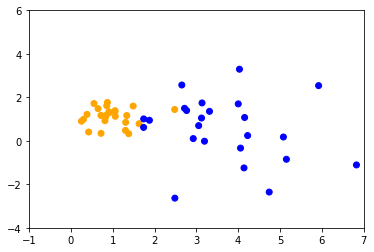

In [4]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset

In [5]:
test_n1, test_n2 = 100, 100

# call the test data and labels test_data and test_label respectively
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

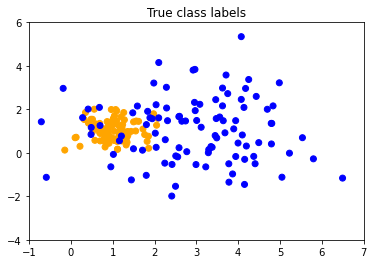

In [13]:
fig = plt.figure()
plt.title("True class labels")
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$

In [7]:
def knnClassify(train_data, train_labels, test_data, k=1):

    distances_to_testsamp = euclidean_distances(test_data, train_data) #shape n_testsamp * n_trainsamp
    k_nearest_neighbors_idx = np.argsort(distances_to_testsamp,axis=1)[:,:k]
    k_nearest_neighbors_labels = train_labels[k_nearest_neighbors_idx]
    majority_vote = np.zeros(k_nearest_neighbors_labels.shape[0])
    for sampidx in range(k_nearest_neighbors_labels.shape[0]):
        (labels, counts) = np.unique(k_nearest_neighbors_labels[sampidx,:], return_counts=True)
        majority_vote[sampidx] = labels[np.argmax(counts)]
    
    return majority_vote



In [8]:
pred_labels = knnClassify(train_data, train_labels, test_data, 3)


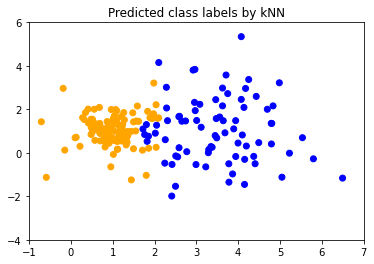

In [14]:
fig = plt.figure()
plt.title('Predicted class labels by kNN')
color = ['orange' if l == 1 else 'blue' for l in pred_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()


## c)

### Write your expectations for the results here
Errors will occur primarily in atypical / outlier points, e.g., points from one category that lie in the part of the space that is primarily dominated by the other category.

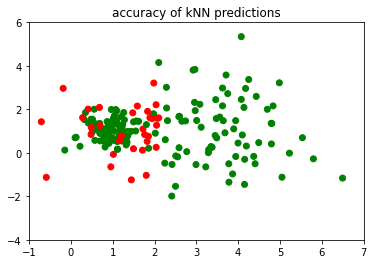

In [15]:
correct_preds = (test_labels == pred_labels)

fig = plt.figure()
plt.title("accuracy of kNN predictions")
color = ['green' if correct else 'red' for correct in correct_preds]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

### Comment
The plot confirms the intuition explained above. All misclassified (red) points are blue points that lie in the part of the space primarily populated by the yellow cluster.

## d)

define the empirical risk with 0-1-loss

In [16]:
def empRiskWith01loss(test_labels, pred_labels):
    loss = sum(test_labels != pred_labels)
    return loss

In [17]:
empRiskWith01loss(test_labels, pred_labels)

31

Compute the risk for various k and plot it

Text(0, 0.5, 'empirical 0-1 loss')

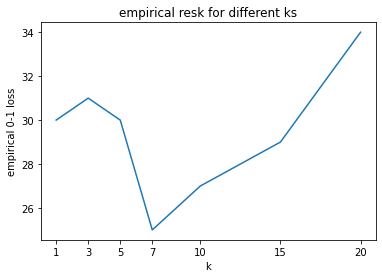

In [25]:
ks = [1, 3, 5, 7, 10, 15, 20]

pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical resk for different ks")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Which value of k would you use?

7

### e)

In [29]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

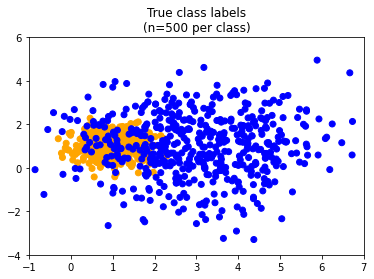

In [34]:
# plot the points with color dependent on class
fig = plt.figure()
plt.title("True class labels\n(n=500 per class)")
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Text(0, 0.5, 'empirical 0-1 loss')

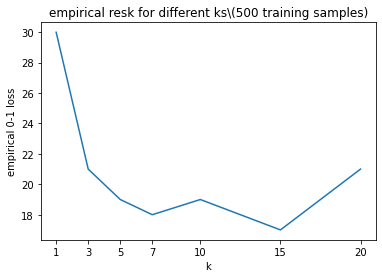

In [33]:
# plot the 01 emprirical risk for different values of k and n_test
#I don't get this, the task says that we are supposed to generate a new *training* set with 500 samples per class, but here it says we should generate test sets of different size...
ks = [1, 3, 5, 7, 10, 15, 20]
n_test_list = [100,250,500,750,1001,1500]



pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical resk for different ks\(500 training samples)")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Which k performs best in this case? If it changed, can you explain why?

Now 15 is the best-performing k. Since more training data is available now, the chances that the k nearest neighbors belong to the "right" class (i.e., the class that populates a given area of the feature space) have increased for a given k.

### f)

In [ ]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)


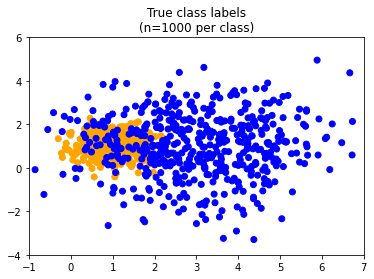

In [35]:
# plot the points with color dependent on class
# plot the points with color dependent on class
fig = plt.figure()
plt.title("True class labels\n(n=1000 per class)")
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Text(0, 0.5, 'empirical 0-1 loss')

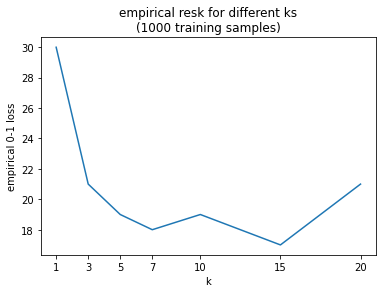

In [37]:
# plot the 01 emprirical risk for different values of k
ks = [1, 3, 5, 7, 10, 15, 20]



pred_labels_list = [knnClassify(train_data, train_labels, test_data, k) for k in ks]
emp_risk_list = [empRiskWith01loss(test_labels, pred_labels_tmp) for pred_labels_tmp in pred_labels_list]

fig = plt.figure()
plt.title("empirical resk for different ks\n(1000 training samples)")
plt.plot(ks, emp_risk_list)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("empirical 0-1 loss")

### Comment

now k=1 seems to be optimal. --> explanation?

# Exercise 2
Load data and show one class

In [ ]:
train_df = pd.read_csv('train_USPS.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).values
train_labels = train_df['Label'].values
test_df = pd.read_csv('test_USPS.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).values
test_labels = test_df['Label'].values

In [ ]:
_ = plt.imshow(train_data[3].reshape(16,16))

## a)

Find out if the dataset is balanced

In [ ]:
# find proportion of labels in training set
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# find proportion of labels in test set
# YOUR CODE HERE
raise NotImplementedError()

## b)

Compute knn for the USPS dataset

In [ ]:
%%time

# YOUR CODE HERE
raise NotImplementedError()